In [1]:
'''
import sys
orig_stdout = sys.stdout
f = open('output.txt', 'w')
sys.stdout = f
'''

"\nimport sys\norig_stdout = sys.stdout\nf = open('output.txt', 'w')\nsys.stdout = f\n"

In [2]:
import nltk

In [3]:
from nltk.corpus import brown

In [4]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [5]:
sentences = list(brown.sents()[0:40000])

In [6]:
# Data Pre-Processing
for i in range(len(sentences)):
    sentences[i] = [token.lower() for token in sentences[i]]
for i in range(len(sentences)):
    p=[]
    for j in range(len(sentences[i])):
        if sentences[i][j].isalpha()==True:
            p.append(sentences[i][j])
    sentences[i]=p
for i in range(len(sentences)):
    sentences[i]=' '.join(sentences[i])

In [7]:
from nltk import bigrams, ngrams, trigrams 


In [8]:
# Verification of Zipf's Law for Unigrams
unigrams=[]
for elem in sentences:
    unigrams.extend(elem.split())
from nltk.probability import FreqDist
fdist = FreqDist(unigrams)
import pylab
import math
from scipy import stats
words = fdist.most_common()
x = [math.log10(i[1]) for i in words]
y = [math.log10(i) for i in range(1, len(x))]
x.pop()
(m, b) = pylab.polyfit(x, y, 1)
yp = pylab.polyval([m, b], x)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('Slope and Intercept for log-log plot for zipfs law in unigrams')
print(slope,intercept)

Slope and Intercept for log-log plot for zipfs law in unigrams
-0.7294188985606873 4.485539390443362


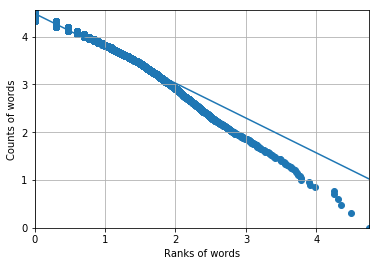

In [9]:
# Plot for Unigram Zipf's Law
pylab.plot(x, yp)
pylab.scatter(x, y)
pylab.ylim([min(y), max(y)])
pylab.xlim([min(x), max(x)])
pylab.grid(True)
pylab.ylabel('Counts of words')
pylab.xlabel('Ranks of words')
pylab.show()

In [10]:
# Top 10 Unigrams
print('Top 10 Unigrams with count')
print(words[0:10])

Top 10 Unigrams with count
[('the', 56448), ('of', 31276), ('and', 22091), ('to', 20335), ('in', 17696), ('a', 17641), ('is', 9474), ('that', 8240), ('for', 7787), ('it', 6051)]


In [11]:
# Function to Make Bigram Model from Sentences
def bigram_model(sentences):
    model={}
    for sent in sentences:
         for w1,w2 in ngrams(sent.split(),2, pad_left=True,pad_right=True):
            if w1 not in model:
                model[w1]={}
            if w2 not in model[w1]:
                model[w1][w2]=0
            model[w1][w2]+=1
    return model

In [12]:
# Verification of Zipf's Law for Bigrams
bigram=bigram_model(sentences)
built_bigram={}
for i in bigram.keys():
    for j in bigram[i].keys():
        built_bigram[str(i)+' '+str(j)]=bigram[i][j]
from nltk.probability import FreqDist
fdist2 = FreqDist(built_bigram)
import pylab
import math
from scipy import stats
words = fdist2.most_common()
x = [math.log10(i[1]) for i in words]
y = [math.log10(i) for i in range(1, len(x))]
x.pop()
(m, b) = pylab.polyfit(x, y, 1)
yp = pylab.polyval([m, b], x)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('Slope and Intercept for log-log plot for zipfs law in bigrams')
print(slope,intercept)

Slope and Intercept for log-log plot for zipfs law in bigrams
-1.4104530417477712 5.2802626901581


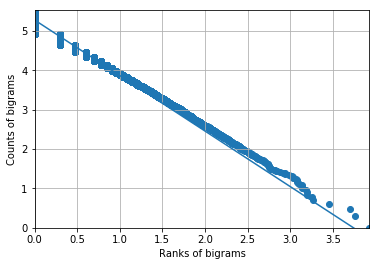

In [13]:
# Plot for Bigram Zipf's Law
pylab.plot(x, yp)
pylab.scatter(x, y)
pylab.ylim([min(y), max(y)])
pylab.xlim([min(x), max(x)])
pylab.grid(True)
pylab.ylabel('Counts of bigrams')
pylab.xlabel('Ranks of bigrams')
pylab.show()

In [14]:
# None corresponds to the pad
# Top 10 Bigrams with None allowed
print('Top 10 Bigrams with count when None allowed')
print(words[0:10])

Top 10 Bigrams with count when None allowed
[('of the', 8516), ('None the', 5820), ('in the', 4992), ('to the', 2825), ('and the', 1864), ('on the', 1824), ('for the', 1592), ('None in', 1589), ('None it', 1519), ('it is', 1390)]


In [15]:
# Top 10 Bigrams without None 
print('Top 10 Bigrams with count when None not allowed')
ans=[]
for i in words:
    if 'None' not in i[0]:
        ans.append(i)
    if len(ans)==10:
        break
print(ans)

Top 10 Bigrams with count when None not allowed
[('of the', 8516), ('in the', 4992), ('to the', 2825), ('and the', 1864), ('on the', 1824), ('for the', 1592), ('it is', 1390), ('to be', 1373), ('with the', 1262), ('that the', 1244)]


In [16]:
# Function to make Trigram Model from Sentences
def trigram_model(sentences):
    model={}
    for sent in sentences:
         for w1,w2,w3 in ngrams(sent.split(),3, pad_left=True,pad_right=True):
            if (w1,w2) not in model:
                model[(w1,w2)]={}
            if w3 not in model[(w1,w2)]:
                model[(w1,w2)][w3]=0
            model[(w1,w2)][w3]+=1
    return model

In [17]:
# Verification of Zipf's Law for Trigrams
trigram=trigram_model(sentences)
built_trigram={}
for i in trigram.keys():
    for j in trigram[i].keys():
        built_trigram[str(i[0])+' '+str(i[1])+' '+str(j)]=trigram[i][j]
from nltk.probability import FreqDist
fdist3 = FreqDist(built_trigram)
import pylab
import math
from scipy import stats
words = fdist3.most_common()
x = [math.log10(i[1]) for i in words]
y = [math.log10(i) for i in range(1, len(x))]
x.pop()
(m, b) = pylab.polyfit(x, y, 1)
yp = pylab.polyval([m, b], x)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('Slope and Intercept for log-log plot for zipfs law in trigrams')
print(slope,intercept)

Slope and Intercept for log-log plot for zipfs law in trigrams
-2.1975922562310486 5.467006145296135


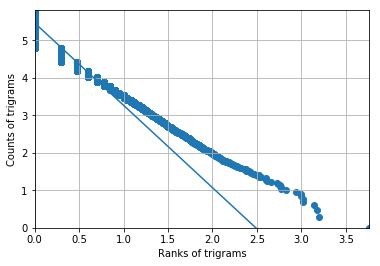

In [18]:
# Zipf's Law plot for Trigrams
pylab.plot(x, yp)
pylab.scatter(x, y)
pylab.ylim([min(y), max(y)])
pylab.xlim([min(x), max(x)])
pylab.grid(True)
pylab.ylabel('Counts of trigrams')
pylab.xlabel('Ranks of trigrams')
pylab.show()

In [19]:
# None corresponds to the pad
# Top 10 Trigrams with None allowed
print('Top 10 Trigrams with count when None allowed')
print(words[0:10])

Top 10 Trigrams with count when None allowed
[('None None the', 5820), ('None None in', 1589), ('None None it', 1519), ('None None he', 1377), ('None None this', 1054), ('None None but', 1038), ('None None None', 998), ('None None a', 980), ('None None and', 867), ('None None i', 675)]


In [20]:
# Top 10 Trigrams without None 
print('Top 10 Trigrams with count when None not allowed')
ans=[]
for i in words:
    if 'None' not in i[0]:
        ans.append(i)
    if len(ans)==10:
        break
print(ans)

Top 10 Trigrams with count when None not allowed
[('one of the', 337), ('the united states', 333), ('as well as', 225), ('some of the', 156), ('the fact that', 154), ('part of the', 131), ('of the united', 128), ('it is not', 126), ('a number of', 119), ('there is a', 118)]


In [21]:
# Converting Models of Count to Models of Probabilities

from collections import Counter
unigram=Counter(unigrams)
unigram_total=len(unigrams)

for word in unigram:
    unigram[word]/=unigram_total

for w1 in bigram:
        tot_count=float(sum(bigram[w1].values()))
        for w2 in bigram[w1]:
            bigram[w1][w2]/=tot_count

for (w1,w2) in trigram:
        tot_count=float(sum(trigram[(w1,w2)].values()))
        for w3 in trigram[(w1,w2)]:
            trigram[(w1,w2)][w3]/=tot_count


In [22]:
text_file = open("test_examples.txt", "r")
test_sentences=text_file.read().split('\n')
# test_sentences=['he lived a good life','the man was happy','the person was good','the girl was sad','he won the war']

In [23]:
print("Unigram Test")
#computes perplexity of the unigram model on a testset  
def uniperplexity(testset, model):
    testset = testset.split()
    perplexity = 1
    N = 0
    for word in testset:
        N += 1
        perplexity = perplexity * (1/model[word])
    perplexity = pow(perplexity, 1/float(N)) 
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(uniperplexity(i, unigram)))

Unigram Test
The sequence he lived a good life has perplexity of 677.7331175727362
The sequence the man was happy has perplexity of 393.42927411327105
The sequence the person was good has perplexity of 332.3124643009282
The sequence the girl was sad has perplexity of 883.0764781243006
The sequence he won the war has perplexity of 462.03024050657456


In [24]:
print('Bigram Test')
#computes perplexity of the bigram model on a testset  
def biperplexity(testset, model):
    testset = testset.split()
    testset = [None] + testset + [None]
    perplexity = 1
    N = 0
    for i in range(1,len(testset)):
        N += 1
        try:
            model[testset[i-1]][testset[i]]
        except KeyError:
            perplexity=math.inf
            break
        perplexity = perplexity * (1/model[testset[i-1]][testset[i]])
    perplexity = pow(perplexity, 1/float(N)) 
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(biperplexity(i, bigram)))

Bigram Test
The sequence he lived a good life has perplexity of 85.84319272687979
The sequence the man was happy has perplexity of 80.4126602053961
The sequence the person was good has perplexity of 142.25717469980296
The sequence the girl was sad has perplexity of inf
The sequence he won the war has perplexity of 64.26020284387174


In [25]:
print('Trigram Test')
#computes perplexity of the trigram model on a testset  
def triperplexity(testset, model):
    testset = testset.split()
    testset = [None] + [None] + testset + [None] + [None] 
    perplexity = 1
    N = 0
    for i in range(2,len(testset)):
        N += 1
        try:
            model[(testset[i-2],testset[i-1])][testset[i]]
        except KeyError:
            perplexity=math.inf
            break
        perplexity = perplexity * (1/model[(testset[i-2],testset[i-1])][testset[i]])
    perplexity = pow(perplexity, 1/float(N)) 
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(triperplexity(i, trigram)))

Trigram Test
The sequence he lived a good life has perplexity of inf
The sequence the man was happy has perplexity of inf
The sequence the person was good has perplexity of inf
The sequence the girl was sad has perplexity of inf
The sequence he won the war has perplexity of 14.018332988300738


In [26]:
# Calculating Log likehoods of each model on Test Data
import numpy as np

test_unigram_arr=[]
print('Unigram test \n')
for elem in test_sentences:
    p_val=np.sum([math.log(unigram[i]) for i in elem.split()])
    test_unigram_arr.append(p_val)
    print('The sequence '+elem+' has unigram log-likelihood of '+ str(round(p_val,4)))


print('\nBigram test \n')
test_bigram_arr=[]
for elem in test_sentences:
    p_val=0
    for w1,w2 in bigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            bigram[w1][w2]
        except KeyError:
            p_val=-1*math.inf
            break
        p_val+=math.log(bigram[w1][w2])
    print('The sequence '+ elem +' has bigram log-likelihood of '+ str(round(p_val,4)))
    
    test_bigram_arr.append(p_val)


test_trigram_arr=[]
print('\nTrigram test \n')
for elem in test_sentences:
    p_val=0
    for w1,w2,w3 in trigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(trigram[(w1,w2)][w3])
        except Exception as e:
            p_val=-1*math.inf
            break
    print('The sequence '+ elem +' has trigram log-likelihood of '+ str(round(p_val,4)))
    
    test_trigram_arr.append(p_val)
            

Unigram test 

The sequence he lived a good life has unigram log-likelihood of -32.5938
The sequence the man was happy has unigram log-likelihood of -23.8996
The sequence the person was good has unigram log-likelihood of -23.2243
The sequence the girl was sad has unigram log-likelihood of -27.1336
The sequence he won the war has unigram log-likelihood of -24.5425

Bigram test 

The sequence he lived a good life has bigram log-likelihood of -26.7151
The sequence the man was happy has bigram log-likelihood of -21.9359
The sequence the person was good has bigram log-likelihood of -24.7882
The sequence the girl was sad has bigram log-likelihood of -inf
The sequence he won the war has bigram log-likelihood of -20.8147

Trigram test 

The sequence he lived a good life has trigram log-likelihood of -inf
The sequence the man was happy has trigram log-likelihood of -inf
The sequence the person was good has trigram log-likelihood of -inf
The sequence the girl was sad has trigram log-likelihood o

In [27]:
# Counts Models
bigram_counts=bigram_model(sentences)
trigram_counts=trigram_model(sentences)

In [28]:
# Additive Smoothing Models for k=1
bi_ls=bigram_model(sentences)
tri_ls=trigram_model(sentences)
k=1
from collections import Counter
uni_ls=Counter(unigrams)
unigram_total=len(unigrams)
u=len(set(unigrams))
for word in uni_ls:
    uni_ls[word]=(k+uni_ls[word])/(unigram_total+k*u)
ubp=(k)/(unigram_total+k*u)

for w1 in bi_ls:
        tot_count=float(sum(bi_ls[w1].values()))
        for w2 in bi_ls[w1]:
            bi_ls[w1][w2]=(k+bi_ls[w1][w2])/(tot_count+k*u)

for (w1,w2) in tri_ls:
        tot_count=float(sum(tri_ls[(w1,w2)].values()))
        for w3 in tri_ls[(w1,w2)]:
            tri_ls[(w1,w2)][w3]=(k+tri_ls[(w1,w2)][w3])/(k*u+tot_count)

print('Additive Smoothing with k='+str(k))

import numpy as np

test_unigram_arr=[]

print('Unigram test with Additive Smoothing\n')
for elem in test_sentences:
    p_val=np.sum([math.log(uni_ls[i]) for i in elem.split()])
    test_unigram_arr.append(p_val)
    print('The sequence '+elem+' has unigram log-likelihood of '+ str(round(p_val,8)))


print('\nBigram test with Additive Smoothing\n')

test_bigram_arr=[]

for elem in test_sentences:
    p_val=0
    for w1,w2 in bigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(bi_ls[w1][w2])
        except Exception as e:
            p_val+=math.log(k/(float(sum(bigram_counts[w1].values()))+k*u))
    print('The sequence '+ elem +' has bigram log-likelihood of '+ str(round(p_val,8)))
    
    test_bigram_arr.append(p_val)


test_trigram_arr=[]
print('\nTrigram test with Additive Smoothing\n')
for elem in test_sentences:
    p_val=0
    for w1,w2,w3 in trigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(tri_ls[(w1,w2)][w3])
        except Exception as e:
            try:
                p_val+=math.log((k/(k*u+float(sum(trigram_counts[(w1,w2)].values())))))
            except Exception as e:
                p_val+=math.log((k/(k*u)))
    print('The sequence '+ elem +' has trigram log-likelihood of '+ str(round(p_val,8)))
    
    test_trigram_arr.append(p_val)
     
print('\nUnigram Perplexity with Additive Smoothing')
for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(uniperplexity(i, uni_ls)))
    
print('\nBigram Perplexity with Additive Smoothing')
#computes perplexity of the bigram model on a testset  
def mbiperplexity(testset, model):
    testset = testset.split()
    testset = [None] + testset + [None]
    perplexity = 1
    N = 0
    for i in range(1,len(testset)):
        N += 1
        try:
            perplexity = perplexity * (1/model[testset[i-1]][testset[i]])
        except KeyError:
            perplexity = perplexity * (1/(k/(float(sum(bigram_counts[w1].values()))+k*u)))
    perplexity = pow(perplexity, 1/float(N)) 
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(mbiperplexity(i, bi_ls)))

print('\nTrigram Perplexity with Additive Smoothing')
#computes perplexity of the trigram model on a testset  
def ttriperplexity(testset, model):
    testset = testset.split()
    perplexity = 1
    N = 0
    for i in range(2,len(testset)):
        N += 1
        try:
            perplexity = perplexity * pow((1/model[(testset[i-2],testset[i-1])][testset[i]]),1/float(N))
        except KeyError:
            try:
                perplexity = perplexity * pow((1/(k/(k*u+float(sum(trigram_counts[(w1,w2)].values()))))),1/float(N))
            except Exception as e:
                perplexity = perplexity * pow((1/(k/(k*u))),1/float(N))
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(ttriperplexity(i, tri_ls)))

Additive Smoothing with k=1
Unigram test with Additive Smoothing

The sequence he lived a good life has unigram log-likelihood of -32.80237583
The sequence the man was happy has unigram log-likelihood of -24.06386777
The sequence the person was good has unigram log-likelihood of -23.39853251
The sequence the girl was sad has unigram log-likelihood of -27.24934479
The sequence he won the war has unigram log-likelihood of -24.70738218

Bigram test with Additive Smoothing

The sequence he lived a good life has bigram log-likelihood of -43.66615774
The sequence the man was happy has bigram log-likelihood of -34.8631562
The sequence the person was good has bigram log-likelihood of -36.54954686
The sequence the girl was sad has bigram log-likelihood of -40.5430167
The sequence he won the war has bigram log-likelihood of -34.35564902

Trigram test with Additive Smoothing

The sequence he lived a good life has trigram log-likelihood of -60.0475751
The sequence the man was happy has trigram log

In [29]:
# Additive Smoothing Models for k=0.1
bi_ls=bigram_model(sentences)
tri_ls=trigram_model(sentences)
k=0.1
from collections import Counter
uni_ls=Counter(unigrams)
unigram_total=len(unigrams)
u=len(set(unigrams))
for word in uni_ls:
    uni_ls[word]=(k+uni_ls[word])/(unigram_total+k*u)
ubp=(k)/(unigram_total+k*u)

for w1 in bi_ls:
        tot_count=float(sum(bi_ls[w1].values()))
        for w2 in bi_ls[w1]:
            bi_ls[w1][w2]=(k+bi_ls[w1][w2])/(tot_count+k*u)

for (w1,w2) in tri_ls:
        tot_count=float(sum(tri_ls[(w1,w2)].values()))
        for w3 in tri_ls[(w1,w2)]:
            tri_ls[(w1,w2)][w3]=(k+tri_ls[(w1,w2)][w3])/(k*u+tot_count)

print('Additive Smoothing with k='+str(k))

import numpy as np

test_unigram_arr=[]

print('Unigram test with Additive Smoothing\n')
for elem in test_sentences:
    p_val=np.sum([math.log(uni_ls[i]) for i in elem.split()])
    test_unigram_arr.append(p_val)
    print('The sequence '+elem+' has unigram log-likelihood of '+ str(round(p_val,8)))


print('\nBigram test with Additive Smoothing\n')

test_bigram_arr=[]

for elem in test_sentences:
    p_val=0
    for w1,w2 in bigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(bi_ls[w1][w2])
        except Exception as e:
            p_val+=math.log(k/(float(sum(bigram_counts[w1].values()))+k*u))
    print('The sequence '+ elem +' has bigram log-likelihood of '+ str(round(p_val,8)))
    
    test_bigram_arr.append(p_val)


test_trigram_arr=[]
print('\nTrigram test with Additive Smoothing\n')
for elem in test_sentences:
    p_val=0
    for w1,w2,w3 in trigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(tri_ls[(w1,w2)][w3])
        except Exception as e:
            try:
                p_val+=math.log((k/(k*u+float(sum(trigram_counts[(w1,w2)].values())))))
            except Exception as e:
                p_val+=math.log((k/(k*u)))
    print('The sequence '+ elem +' has trigram log-likelihood of '+ str(round(p_val,8)))
    
    test_trigram_arr.append(p_val)
     
print('\nUnigram Perplexity with Additive Smoothing')
for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(uniperplexity(i, uni_ls)))
    
print('\nBigram Perplexity with Additive Smoothing')
#computes perplexity of the bigram model on a testset  
def mbiperplexity(testset, model):
    testset = testset.split()
    testset = [None] + testset + [None]
    perplexity = 1
    N = 0
    for i in range(1,len(testset)):
        N += 1
        try:
            perplexity = perplexity * (1/model[testset[i-1]][testset[i]])
        except KeyError:
            perplexity = perplexity * (1/(k/(float(sum(bigram_counts[w1].values()))+k*u)))
    perplexity = pow(perplexity, 1/float(N)) 
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(mbiperplexity(i, bi_ls)))

print('\nTrigram Perplexity with Additive Smoothing')
#computes perplexity of the trigram model on a testset  
def ttriperplexity(testset, model):
    testset = testset.split()
    perplexity = 1
    N = 0
    for i in range(2,len(testset)):
        N += 1
        try:
            perplexity = perplexity * pow((1/model[(testset[i-2],testset[i-1])][testset[i]]),1/float(N))
        except KeyError:
            try:
                perplexity = perplexity * pow((1/(k/(k*u+float(sum(trigram_counts[(w1,w2)].values()))))),1/float(N))
            except Exception as e:
                perplexity = perplexity * pow((1/(k/(k*u))),1/float(N))
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(ttriperplexity(i, tri_ls)))

Additive Smoothing with k=0.1
Unigram test with Additive Smoothing

The sequence he lived a good life has unigram log-likelihood of -32.61509462
The sequence the man was happy has unigram log-likelihood of -23.9164008
The sequence the person was good has unigram log-likelihood of -23.24210663
The sequence the girl was sad has unigram log-likelihood of -27.14544629
The sequence he won the war has unigram log-likelihood of -24.55937915

Bigram test with Additive Smoothing

The sequence he lived a good life has bigram log-likelihood of -35.36645242
The sequence the man was happy has bigram log-likelihood of -28.43177263
The sequence the person was good has bigram log-likelihood of -30.52678498
The sequence the girl was sad has bigram log-likelihood of -36.49939055
The sequence he won the war has bigram log-likelihood of -27.77381152

Trigram test with Additive Smoothing

The sequence he lived a good life has trigram log-likelihood of -53.81814805
The sequence the man was happy has trigram

In [30]:
# Additive Smoothing Models for k=0.01
bi_ls=bigram_model(sentences)
tri_ls=trigram_model(sentences)
k=0.01
from collections import Counter
uni_ls=Counter(unigrams)
unigram_total=len(unigrams)
u=len(set(unigrams))
for word in uni_ls:
    uni_ls[word]=(k+uni_ls[word])/(unigram_total+k*u)
ubp=(k)/(unigram_total+k*u)

for w1 in bi_ls:
        tot_count=float(sum(bi_ls[w1].values()))
        for w2 in bi_ls[w1]:
            bi_ls[w1][w2]=(k+bi_ls[w1][w2])/(tot_count+k*u)

for (w1,w2) in tri_ls:
        tot_count=float(sum(tri_ls[(w1,w2)].values()))
        for w3 in tri_ls[(w1,w2)]:
            tri_ls[(w1,w2)][w3]=(k+tri_ls[(w1,w2)][w3])/(k*u+tot_count)

print('Additive Smoothing with k='+str(k))

import numpy as np

test_unigram_arr=[]

print('Unigram test with Additive Smoothing\n')
for elem in test_sentences:
    p_val=np.sum([math.log(uni_ls[i]) for i in elem.split()])
    test_unigram_arr.append(p_val)
    print('The sequence '+elem+' has unigram log-likelihood of '+ str(round(p_val,8)))


print('\nBigram test with Additive Smoothing\n')

test_bigram_arr=[]

for elem in test_sentences:
    p_val=0
    for w1,w2 in bigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(bi_ls[w1][w2])
        except Exception as e:
            p_val+=math.log(k/(float(sum(bigram_counts[w1].values()))+k*u))
    print('The sequence '+ elem +' has bigram log-likelihood of '+ str(round(p_val,8)))
    
    test_bigram_arr.append(p_val)


test_trigram_arr=[]
print('\nTrigram test with Additive Smoothing\n')
for elem in test_sentences:
    p_val=0
    for w1,w2,w3 in trigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(tri_ls[(w1,w2)][w3])
        except Exception as e:
            try:
                p_val+=math.log((k/(k*u+float(sum(trigram_counts[(w1,w2)].values())))))
            except Exception as e:
                p_val+=math.log((k/(k*u)))
    print('The sequence '+ elem +' has trigram log-likelihood of '+ str(round(p_val,8)))
    
    test_trigram_arr.append(p_val)
     
print('\nUnigram Perplexity with Additive Smoothing')
for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(uniperplexity(i, uni_ls)))
    
print('\nBigram Perplexity with Additive Smoothing')
#computes perplexity of the bigram model on a testset  
def mbiperplexity(testset, model):
    testset = testset.split()
    testset = [None] + testset + [None]
    perplexity = 1
    N = 0
    for i in range(1,len(testset)):
        N += 1
        try:
            perplexity = perplexity * (1/model[testset[i-1]][testset[i]])
        except KeyError:
            perplexity = perplexity * (1/(k/(float(sum(bigram_counts[w1].values()))+k*u)))
    perplexity = pow(perplexity, 1/float(N)) 
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(mbiperplexity(i, bi_ls)))

print('\nTrigram Perplexity with Additive Smoothing')
#computes perplexity of the trigram model on a testset  
def ttriperplexity(testset, model):
    testset = testset.split()
    perplexity = 1
    N = 0
    for i in range(2,len(testset)):
        N += 1
        try:
            perplexity = perplexity * pow((1/model[(testset[i-2],testset[i-1])][testset[i]]),1/float(N))
        except KeyError:
            try:
                perplexity = perplexity * pow((1/(k/(k*u+float(sum(trigram_counts[(w1,w2)].values()))))),1/float(N))
            except Exception as e:
                perplexity = perplexity * pow((1/(k/(k*u))),1/float(N))
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(ttriperplexity(i, tri_ls)))

Additive Smoothing with k=0.01
Unigram test with Additive Smoothing

The sequence he lived a good life has unigram log-likelihood of -32.59590537
The sequence the man was happy has unigram log-likelihood of -23.90128863
The sequence the person was good has unigram log-likelihood of -23.22608705
The sequence the girl was sad has unigram log-likelihood of -27.13482949
The sequence he won the war has unigram log-likelihood of -24.54421099

Bigram test with Additive Smoothing

The sequence he lived a good life has bigram log-likelihood of -29.71040845
The sequence the man was happy has bigram log-likelihood of -24.39550934
The sequence the person was good has bigram log-likelihood of -26.60998627
The sequence the girl was sad has bigram log-likelihood of -33.98835464
The sequence he won the war has bigram log-likelihood of -23.42543281

Trigram test with Additive Smoothing

The sequence he lived a good life has trigram log-likelihood of -48.83736245
The sequence the man was happy has trigr

In [31]:
# Additive Smoothing Models for k=0.001
bi_ls=bigram_model(sentences)
tri_ls=trigram_model(sentences)
k=0.001
from collections import Counter
uni_ls=Counter(unigrams)
unigram_total=len(unigrams)
u=len(set(unigrams))
for word in uni_ls:
    uni_ls[word]=(k+uni_ls[word])/(unigram_total+k*u)
ubp=(k)/(unigram_total+k*u)

for w1 in bi_ls:
        tot_count=float(sum(bi_ls[w1].values()))
        for w2 in bi_ls[w1]:
            bi_ls[w1][w2]=(k+bi_ls[w1][w2])/(tot_count+k*u)

for (w1,w2) in tri_ls:
        tot_count=float(sum(tri_ls[(w1,w2)].values()))
        for w3 in tri_ls[(w1,w2)]:
            tri_ls[(w1,w2)][w3]=(k+tri_ls[(w1,w2)][w3])/(k*u+tot_count)

print('Additive Smoothing with k='+str(k))

import numpy as np

test_unigram_arr=[]

print('Unigram test with Additive Smoothing\n')
for elem in test_sentences:
    p_val=np.sum([math.log(uni_ls[i]) for i in elem.split()])
    test_unigram_arr.append(p_val)
    print('The sequence '+elem+' has unigram log-likelihood of '+ str(round(p_val,8)))


print('\nBigram test with Additive Smoothing\n')

test_bigram_arr=[]

for elem in test_sentences:
    p_val=0
    for w1,w2 in bigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(bi_ls[w1][w2])
        except Exception as e:
            p_val+=math.log(k/(float(sum(bigram_counts[w1].values()))+k*u))
    print('The sequence '+ elem +' has bigram log-likelihood of '+ str(round(p_val,8)))
    
    test_bigram_arr.append(p_val)


test_trigram_arr=[]
print('\nTrigram test with Additive Smoothing\n')
for elem in test_sentences:
    p_val=0
    for w1,w2,w3 in trigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(tri_ls[(w1,w2)][w3])
        except Exception as e:
            try:
                p_val+=math.log((k/(k*u+float(sum(trigram_counts[(w1,w2)].values())))))
            except Exception as e:
                p_val+=math.log((k/(k*u)))
    print('The sequence '+ elem +' has trigram log-likelihood of '+ str(round(p_val,8)))
    
    test_trigram_arr.append(p_val)
     
print('\nUnigram Perplexity with Additive Smoothing')
for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(uniperplexity(i, uni_ls)))
    
print('\nBigram Perplexity with Additive Smoothing')
#computes perplexity of the bigram model on a testset  
def mbiperplexity(testset, model):
    testset = testset.split()
    testset = [None] + testset + [None]
    perplexity = 1
    N = 0
    for i in range(1,len(testset)):
        N += 1
        try:
            perplexity = perplexity * (1/model[testset[i-1]][testset[i]])
        except KeyError:
            perplexity = perplexity * (1/(k/(float(sum(bigram_counts[w1].values()))+k*u)))
    perplexity = pow(perplexity, 1/float(N)) 
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(mbiperplexity(i, bi_ls)))

print('\nTrigram Perplexity with Additive Smoothing')
#computes perplexity of the trigram model on a testset  
def ttriperplexity(testset, model):
    testset = testset.split()
    perplexity = 1
    N = 0
    for i in range(2,len(testset)):
        N += 1
        try:
            perplexity = perplexity * pow((1/model[(testset[i-2],testset[i-1])][testset[i]]),1/float(N))
        except KeyError:
            try:
                perplexity = perplexity * pow((1/(k/(k*u+float(sum(trigram_counts[(w1,w2)].values()))))),1/float(N))
            except Exception as e:
                perplexity = perplexity * pow((1/(k/(k*u))),1/float(N))
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(ttriperplexity(i, tri_ls)))

Additive Smoothing with k=0.001
Unigram test with Additive Smoothing

The sequence he lived a good life has unigram log-likelihood of -32.59398169
The sequence the man was happy has unigram log-likelihood of -23.89977364
The sequence the person was good has unigram log-likelihood of -23.22448121
The sequence the girl was sad has unigram log-likelihood of -27.13376548
The sequence he won the war has unigram log-likelihood of -24.54269038

Bigram test with Additive Smoothing

The sequence he lived a good life has bigram log-likelihood of -27.32027061
The sequence the man was happy has bigram log-likelihood of -22.48238605
The sequence the person was good has bigram log-likelihood of -25.08750661
The sequence the girl was sad has bigram log-likelihood of -33.03525774
The sequence he won the war has bigram log-likelihood of -21.35969732

Trigram test with Additive Smoothing

The sequence he lived a good life has trigram log-likelihood of -46.78854666
The sequence the man was happy has trig

In [32]:
# Additive Smoothing Models for k=0.0001
bi_ls=bigram_model(sentences)
tri_ls=trigram_model(sentences)
k=0.0001
from collections import Counter
uni_ls=Counter(unigrams)
unigram_total=len(unigrams)
u=len(set(unigrams))
for word in uni_ls:
    uni_ls[word]=(k+uni_ls[word])/(unigram_total+k*u)
ubp=(k)/(unigram_total+k*u)

for w1 in bi_ls:
        tot_count=float(sum(bi_ls[w1].values()))
        for w2 in bi_ls[w1]:
            bi_ls[w1][w2]=(k+bi_ls[w1][w2])/(tot_count+k*u)

for (w1,w2) in tri_ls:
        tot_count=float(sum(tri_ls[(w1,w2)].values()))
        for w3 in tri_ls[(w1,w2)]:
            tri_ls[(w1,w2)][w3]=(k+tri_ls[(w1,w2)][w3])/(k*u+tot_count)

print('Additive Smoothing with k='+str(k))

import numpy as np

test_unigram_arr=[]

print('Unigram test with Additive Smoothing\n')
for elem in test_sentences:
    p_val=np.sum([math.log(uni_ls[i]) for i in elem.split()])
    test_unigram_arr.append(p_val)
    print('The sequence '+elem+' has unigram log-likelihood of '+ str(round(p_val,8)))


print('\nBigram test with Additive Smoothing\n')

test_bigram_arr=[]

for elem in test_sentences:
    p_val=0
    for w1,w2 in bigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(bi_ls[w1][w2])
        except Exception as e:
            p_val+=math.log(k/(float(sum(bigram_counts[w1].values()))+k*u))
    print('The sequence '+ elem +' has bigram log-likelihood of '+ str(round(p_val,8)))
    
    test_bigram_arr.append(p_val)


test_trigram_arr=[]
print('\nTrigram test with Additive Smoothing\n')
for elem in test_sentences:
    p_val=0
    for w1,w2,w3 in trigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(tri_ls[(w1,w2)][w3])
        except Exception as e:
            try:
                p_val+=math.log((k/(k*u+float(sum(trigram_counts[(w1,w2)].values())))))
            except Exception as e:
                p_val+=math.log((k/(k*u)))
    print('The sequence '+ elem +' has trigram log-likelihood of '+ str(round(p_val,8)))
    
    test_trigram_arr.append(p_val)
     
print('\nUnigram Perplexity with Additive Smoothing')
for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(uniperplexity(i, uni_ls)))
    
print('\nBigram Perplexity with Additive Smoothing')
#computes perplexity of the bigram model on a testset  
def mbiperplexity(testset, model):
    testset = testset.split()
    testset = [None] + testset + [None]
    perplexity = 1
    N = 0
    for i in range(1,len(testset)):
        N += 1
        try:
            perplexity = perplexity * (1/model[testset[i-1]][testset[i]])
        except KeyError:
            perplexity = perplexity * (1/(k/(float(sum(bigram_counts[w1].values()))+k*u)))
    perplexity = pow(perplexity, 1/float(N)) 
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(mbiperplexity(i, bi_ls)))

print('\nTrigram Perplexity with Additive Smoothing')
#computes perplexity of the trigram model on a testset  
def ttriperplexity(testset, model):
    testset = testset.split()
    perplexity = 1
    N = 0
    for i in range(2,len(testset)):
        N += 1
        try:
            perplexity = perplexity * pow((1/model[(testset[i-2],testset[i-1])][testset[i]]),1/float(N))
        except KeyError:
            try:
                perplexity = perplexity * pow((1/(k/(k*u+float(sum(trigram_counts[(w1,w2)].values()))))),1/float(N))
            except Exception as e:
                perplexity = perplexity * pow((1/(k/(k*u))),1/float(N))
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(ttriperplexity(i, tri_ls)))

Additive Smoothing with k=0.0001
Unigram test with Additive Smoothing

The sequence he lived a good life has unigram log-likelihood of -32.59378927
The sequence the man was happy has unigram log-likelihood of -23.8996221
The sequence the person was good has unigram log-likelihood of -23.22432058
The sequence the girl was sad has unigram log-likelihood of -27.13365906
The sequence he won the war has unigram log-likelihood of -24.54253828

Bigram test with Additive Smoothing

The sequence he lived a good life has bigram log-likelihood of -26.78768533
The sequence the man was happy has bigram log-likelihood of -22.00304228
The sequence the person was good has bigram log-likelihood of -24.82092856
The sequence the girl was sad has bigram log-likelihood of -34.11102151
The sequence he won the war has bigram log-likelihood of -20.87998241

Trigram test with Additive Smoothing

The sequence he lived a good life has trigram log-likelihood of -47.64450431
The sequence the man was happy has trig

In [33]:
# Good Turing Method affecting the lower 10 values and allocating the remanining probability in proportion of the remaining most frequent ngrams.

In [34]:
# Good Turing Smoothing for Bigram Model
bi_gt=bigram_model(sentences)
bili=[]
co=0
for c in bigram_counts.keys():
    co+=len(bigram_counts[c])
t=0
for c in bigram_counts.keys():
        for d in bigram_counts[c].keys():
            t+=bigram_counts[c][d]
bili.append(co*co-t)
for i in range(1,12):
    temp=0
    for c in bigram_counts.keys():
        for d in bigram_counts[c].keys():
            if bigram_counts[c][d]==i:
                temp+=1
    bili.append(temp)
# To Store the modified counts
bi_mod_counts=[]
for i in range(1,len(bili)):
    bi_mod_counts.append(i*(bili[i]/float(bili[i-1])))
# Updating Counts in Model    
for c in bi_gt.keys():
        for d in bi_gt[c].keys():
            if bi_gt[c][d] in range(1,11):
                bi_gt[c][d]=bi_mod_counts[bi_gt[c][d]]
# Converting Model with Counts to Probabilities
for w1 in bi_gt:
        tot_count=float(sum(bi_gt[w1].values()))
        for w2 in bi_gt[w1]:
            bi_gt[w1][w2]=(bi_gt[w1][w2])/(tot_count)

In [35]:
print('\nBigram test with Good Turing Smoothing\n')

test_bigram_arr=[]

for elem in test_sentences:
    p_val=0
    for w1,w2 in bigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(bi_gt[w1][w2])
        except Exception as e:
            p_val+=math.log(bi_mod_counts[0]/(float(sum(bigram_counts[w1].values()))))
    print('The sequence '+ elem +' has bigram log-likelihood of '+ str(round(p_val,8)))
    
    test_bigram_arr.append(p_val)

print('\nBigram Perplexity with Good Turing Smoothing')
#computes perplexity of the bigram model on a testset  
def m1biperplexity(testset, model):
    testset = testset.split()
    testset = [None] + testset + [None]
    perplexity = 1
    N = 0
    for i in range(1,len(testset)):
        N += 1
        try:
            perplexity = perplexity * (1/model[testset[i-1]][testset[i]])
        except KeyError:
            perplexity = perplexity * (1/(bi_mod_counts[0]/(float(sum(bigram_counts[w1].values())))))
    perplexity = pow(perplexity, 1/float(N)) 
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(m1biperplexity(i, bi_gt)))


Bigram test with Good Turing Smoothing

The sequence he lived a good life has bigram log-likelihood of -27.71743189
The sequence the man was happy has bigram log-likelihood of -20.92721544
The sequence the person was good has bigram log-likelihood of -24.83631352
The sequence the girl was sad has bigram log-likelihood of -37.02050632
The sequence he won the war has bigram log-likelihood of -20.06233468

Bigram Perplexity with Good Turing Smoothing
The sequence he lived a good life has perplexity of 101.45060014277486
The sequence the man was happy has perplexity of 65.72261538248301
The sequence the person was good has perplexity of 143.63318233923422
The sequence the girl was sad has perplexity of 961.5367459252897
The sequence he won the war has perplexity of 55.283082341739174


In [36]:
# Good Turing Smoothing for Trigrams
tri_gt=trigram_model(sentences)
trili=[]
cou=0
for c in trigram_counts.keys():
    cou+=len(trigram_counts[c])
t=0
for c in trigram_counts.keys():
        for d in trigram_counts[c].keys():
            t+=trigram_counts[c][d]
trili.append(cou*cou-t)
for i in range(1,12):
    temp=0
    for c in trigram_counts.keys():
        for d in trigram_counts[c].keys():
            if trigram_counts[c][d]==i:
                temp+=1
    trili.append(temp)
# To store the modified counts
tri_mod_counts=[]
for i in range(1,len(trili)):
    tri_mod_counts.append(i*(trili[i]/float(trili[i-1])))
# Updating the Counts
for c in tri_gt.keys():
        for d in tri_gt[c].keys():
            if tri_gt[c][d] in range(1,11):
                tri_gt[c][d]=tri_mod_counts[tri_gt[c][d]]
# Converting Model of Counts to Probabilities
for (w1,w2) in tri_gt:
        tot_count=float(sum(tri_gt[(w1,w2)].values()))
        for w3 in tri_gt[(w1,w2)]:
            tri_gt[(w1,w2)][w3]=(tri_gt[(w1,w2)][w3])/(tot_count)

In [37]:
test_trigram_arr=[]
print('\nTrigram test with Good Turing Smoothing\n')
for elem in test_sentences:
    p_val=0
    for w1,w2,w3 in trigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(tri_gt[(w1,w2)][w3])
        except Exception as e:
            try:
                p_val+=math.log((tri_mod_counts[0]/(float(sum(trigram_counts[(w1,w2)].values())))))
            except Exception as e:
                p_val+=math.log((tri_mod_counts[0]/bi_mod_counts[0]))
    print('The sequence '+ elem +' has trigram log-likelihood of '+ str(round(p_val,8)))
    
    test_trigram_arr.append(p_val)

print('\nTrigram Perplexity with Good Turing Smoothing')
#computes perplexity of the trigram model on a testset  
def t1triperplexity(testset, model):
    testset = testset.split()
    perplexity = 1
    N = 0
    for i in range(2,len(testset)):
        N += 1
        try:
            perplexity = perplexity * pow((1/model[(testset[i-2],testset[i-1])][testset[i]]),1/float(N))
        except KeyError:
            try:
                perplexity = perplexity * pow((1/(tri_mod_counts[0]/(float(sum(trigram_counts[(w1,w2)].values()))))),1/float(N))
            except Exception as e:
                perplexity = perplexity * pow((1/(tri_mod_counts[0]/(bi_mod_counts[0]))),1/float(N))
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(t1triperplexity(i, tri_gt)))


Trigram test with Good Turing Smoothing

The sequence he lived a good life has trigram log-likelihood of -58.07371875
The sequence the man was happy has trigram log-likelihood of -40.27026893
The sequence the person was good has trigram log-likelihood of -40.5898134
The sequence the girl was sad has trigram log-likelihood of -29.0057064
The sequence he won the war has trigram log-likelihood of -17.09546651

Trigram Perplexity with Good Turing Smoothing
The sequence he lived a good life has perplexity of 3389328978366.3647
The sequence the man was happy has perplexity of 92415.79846559363
The sequence the person was good has perplexity of 412080362700.0125
The sequence the girl was sad has perplexity of 89298.03158603702
The sequence he won the war has perplexity of 8.695864839975235


In [38]:
print('Interpolation of Bigram Model with lambda value 0.2\n')

lam=0.2

test_bigram_arr=[]

for elem in test_sentences:
    p_val=0
    for w1,w2 in bigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(lam*bigram[w1][w2]+(1-lam)*unigram[w2])
        except Exception as e:
            p_val+=math.log(((1-lam)*unigram[w2]))
    print('The sequence '+ elem +' has bigram log-likelihood of '+ str(round(p_val,8)))
    
    test_bigram_arr.append(p_val)


Interpolation of Bigram Model with lambda value 0.2

The sequence he lived a good life has bigram log-likelihood of -32.40873916
The sequence the man was happy has bigram log-likelihood of -26.24928962
The sequence the person was good has bigram log-likelihood of -27.22715572
The sequence the girl was sad has bigram log-likelihood of -30.10650982
The sequence he won the war has bigram log-likelihood of -25.96759924


In [39]:
print('Interpolation of Bigram Model with lambda value 0.5\n')

lam=0.5

test_bigram_arr=[]

for elem in test_sentences:
    p_val=0
    for w1,w2 in bigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(lam*bigram[w1][w2]+(1-lam)*unigram[w2])
        except Exception as e:
            p_val+=math.log(((1-lam)*unigram[w2]))
    print('The sequence '+ elem +' has bigram log-likelihood of '+ str(round(p_val,8)))
    
    test_bigram_arr.append(p_val)


Interpolation of Bigram Model with lambda value 0.5

The sequence he lived a good life has bigram log-likelihood of -29.33361575
The sequence the man was happy has bigram log-likelihood of -24.05734186
The sequence the person was good has bigram log-likelihood of -25.93593035
The sequence the girl was sad has bigram log-likelihood of -28.95662442
The sequence he won the war has bigram log-likelihood of -23.32978181


In [40]:
print('Interpolation of Bigram Model with lambda value 0.8\n')

lam=0.8

test_bigram_arr=[]

for elem in test_sentences:
    p_val=0
    for w1,w2 in bigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val+=math.log(lam*bigram[w1][w2]+(1-lam)*unigram[w2])
        except Exception as e:
            p_val+=math.log(((1-lam)*unigram[w2]))
    print('The sequence '+ elem +' has bigram log-likelihood of '+ str(round(p_val,8)))
    
    test_bigram_arr.append(p_val)


Interpolation of Bigram Model with lambda value 0.8

The sequence he lived a good life has bigram log-likelihood of -27.57424179
The sequence the man was happy has bigram log-likelihood of -22.66459485
The sequence the person was good has bigram log-likelihood of -25.17318529
The sequence the girl was sad has bigram log-likelihood of -28.83973905
The sequence he won the war has bigram log-likelihood of -21.66946273


In [41]:
lam=0.2
print('Bigram Perplexity with Interpolation of lambda value 0.2')
#computes perplexity of the bigram model on a testset  
def ibperplexity(testset, model1, model2):
    testset = testset.split()
    testset = [None] + testset + [None]
    perplexity = 1
    N = 0
    for i in range(1,len(testset)):
        N += 1
        try:
            perplexity = perplexity * (1/((lam*model1[testset[i-1]][testset[i]])+((1-lam)*model2[testset[i]])))
        except KeyError:
            perplexity = perplexity * (1/(((1-lam)*model2[testset[i]])))
    perplexity = pow(perplexity, 1/float(N)) 
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(ibperplexity(i, bigram, unigram)))

Bigram Perplexity with Interpolation of lambda value 0.2
The sequence he lived a good life has perplexity of 221.72913544511488
The sequence the man was happy has perplexity of 190.53919540280435
The sequence the person was good has perplexity of 231.69715296943434
The sequence the girl was sad has perplexity of 412.1148052284036
The sequence he won the war has perplexity of 180.10136788352423


In [42]:
lam=0.5
print('Bigram Perplexity with Interpolation of lambda value 0.5')
#computes perplexity of the bigram model on a testset  
def ibperplexity(testset, model1, model2):
    testset = testset.split()
    testset = [None] + testset + [None]
    perplexity = 1
    N = 0
    for i in range(1,len(testset)):
        N += 1
        try:
            perplexity = perplexity * (1/((lam*model1[testset[i-1]][testset[i]])+((1-lam)*model2[testset[i]])))
        except KeyError:
            perplexity = perplexity * (1/(((1-lam)*model2[testset[i]])))
    perplexity = pow(perplexity, 1/float(N)) 
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(ibperplexity(i, bigram, unigram)))

Bigram Perplexity with Interpolation of lambda value 0.5
The sequence he lived a good life has perplexity of 132.8121811600024
The sequence the man was happy has perplexity of 122.91196559965756
The sequence the person was good has perplexity of 178.96425097058838
The sequence the girl was sad has perplexity of 327.4465655561572
The sequence he won the war has perplexity of 106.2671666232951


In [43]:
lam=0.8
print('Bigram Perplexity with Interpolation of lambda value 0.8')
#computes perplexity of the bigram model on a testset  
def ibperplexity(testset, model1, model2):
    testset = testset.split()
    testset = [None] + testset + [None]
    perplexity = 1
    N = 0
    for i in range(1,len(testset)):
        N += 1
        try:
            perplexity = perplexity * (1/((lam*model1[testset[i-1]][testset[i]])+((1-lam)*model2[testset[i]])))
        except KeyError:
            perplexity = perplexity * (1/(((1-lam)*model2[testset[i]])))
    perplexity = pow(perplexity, 1/float(N)) 
    return perplexity

for i in test_sentences:
    print('The sequence '+i+' has perplexity of '+str(ibperplexity(i, bigram, unigram)))

Bigram Perplexity with Interpolation of lambda value 0.8
The sequence he lived a good life has perplexity of 99.05814150633329
The sequence the man was happy has perplexity of 93.02971603117257
The sequence the person was good has perplexity of 153.643818834768
The sequence the girl was sad has perplexity of 319.88060292420886
The sequence he won the war has perplexity of 76.2404792740472


In [44]:
'''
sys.stdout = orig_stdout
f.close()
'''

'\nsys.stdout = orig_stdout\nf.close()\n'